## Waste Management Using CNN Model

In [4]:
import kagglehub

path = kagglehub.dataset_download("techsash/waste-classification-data")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\A SRINU\.cache\kagglehub\datasets\techsash\waste-classification-data\versions\1


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [6]:
train_path ="DATASET/TRAIN"
test_path = "DATASET/TEST"

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout,Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [8]:
# visualization
from cv2 import cvtColor
x_data=[]
y_data=[]
for category in glob(train_path+"/*"):
    for file in tqdm(glob(category+"/*")):
        img_array=cv2.imread(file)
        img_array=cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data= pd.DataFrame({'image':x_data,'label':y_data})

100%|██████████| 9999/9999 [01:46<00:00, 93.80it/s] 


In [9]:
data.shape

(15077, 2)

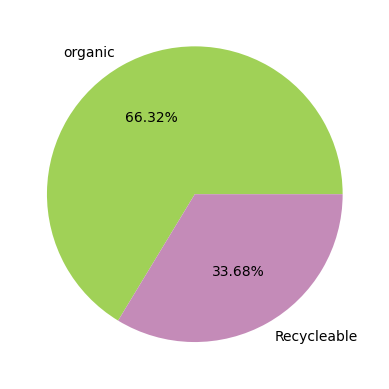

In [10]:
colors=['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(),labels=['organic','Recycleable'],autopct='%0.2f%%',colors=colors)
plt.show()

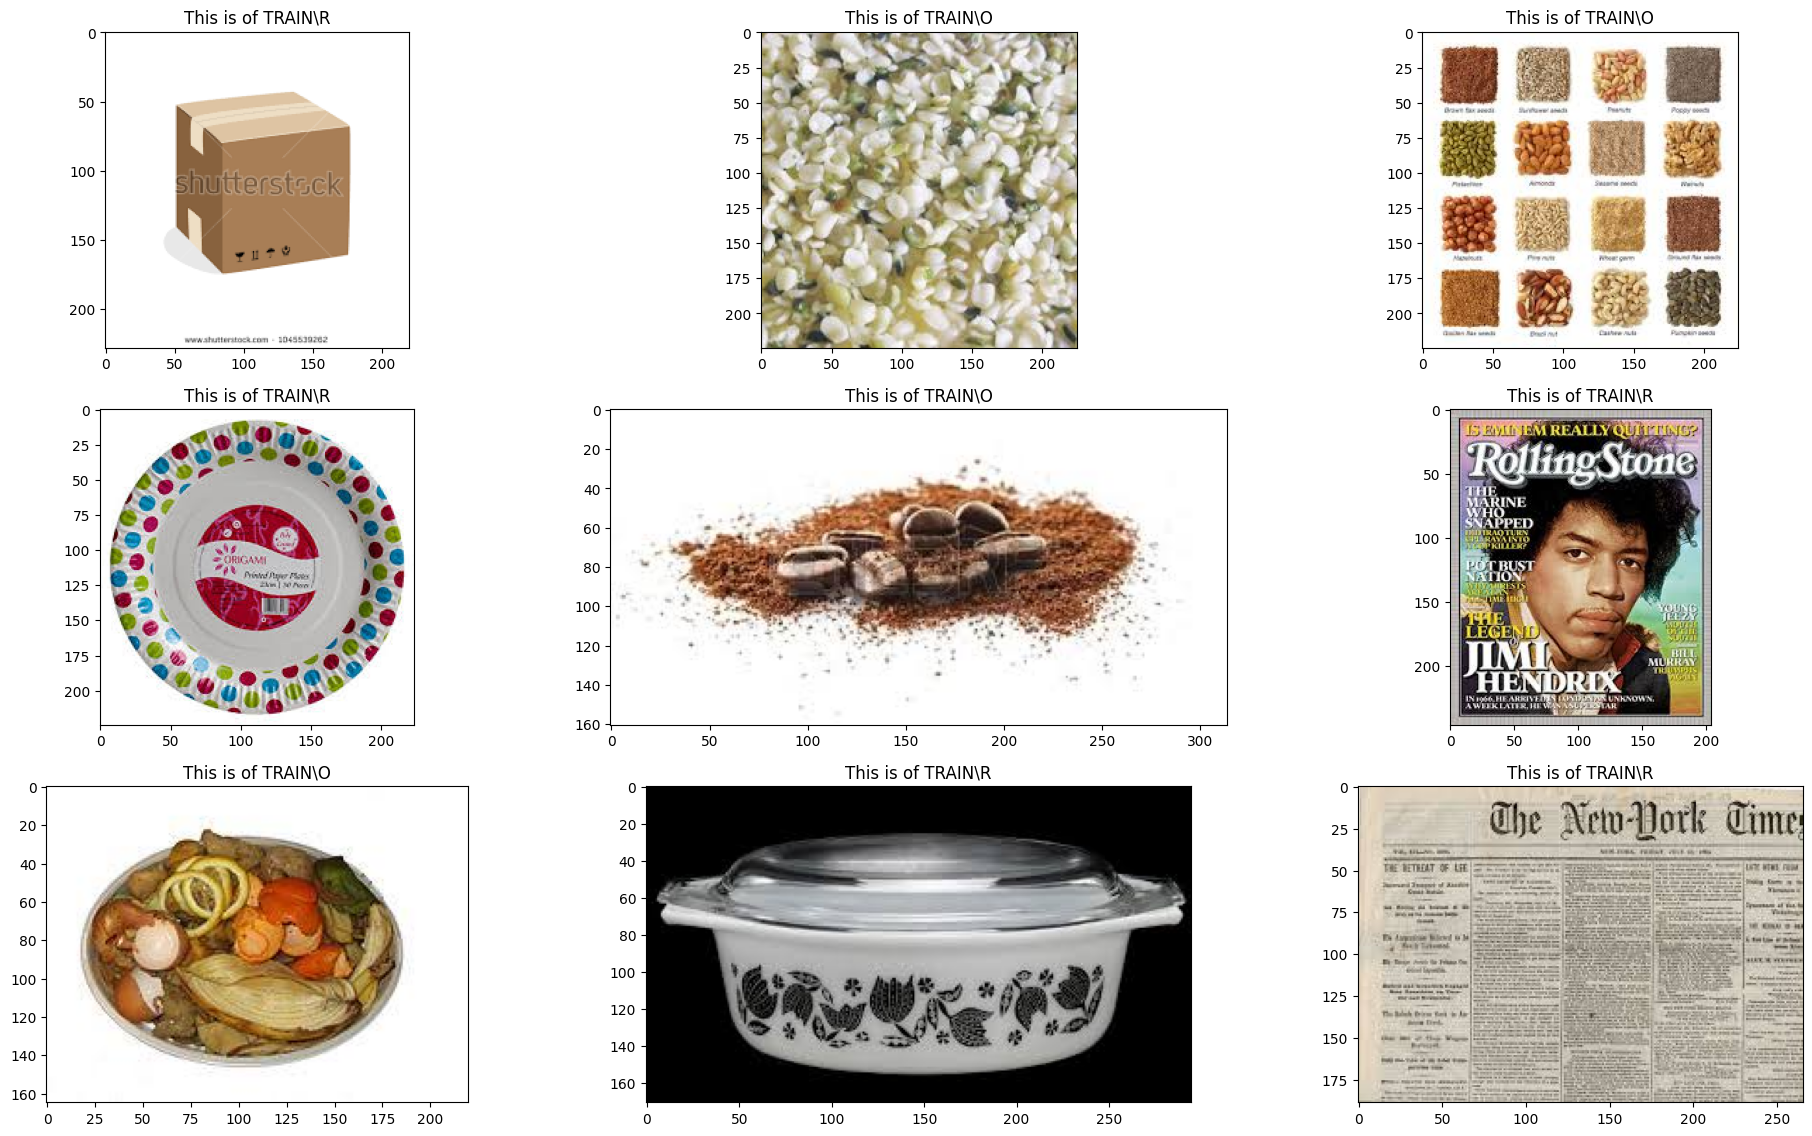

In [11]:
plt.figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(4, 3,(i%12)+1)
    index = np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

In [13]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])
batch_size = 32

In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
train_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [17]:
train_generator = train_datagen.flow_from_directory(
    train_path, 
    target_size = (224, 224),
    batch_size = batch_size, 
    color_mode = "rgb", 
    class_mode = "categorical")

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

Found 15077 images belonging to 2 classes.
Found 1664 images belonging to 2 classes.


In [20]:
hist = model.fit(
    train_generator, 
    epochs=10,   
    validation_data=test_generator
)

Epoch 1/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 336s 706ms/step - accuracy: 0.7606 - loss: 0.5160 - val_accuracy: 0.9441 - val_loss: 0.3220
Epoch 2/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 441s 935ms/step - accuracy: 0.8247 - loss: 0.4047 - val_accuracy: 0.8972 - val_loss: 0.3891
Epoch 3/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 343s 726ms/step - accuracy: 0.8422 - loss: 0.3670 - val_accuracy: 0.8936 - val_loss: 0.3628
Epoch 4/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 364s 772ms/step - accuracy: 0.8559 - loss: 0.3450 - val_accuracy: 0.8816 - val_loss: 0.3297
Epoch 5/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 374s 792ms/step - accuracy: 0.8698 - loss: 0.3243 - val_accuracy: 0.8888 - val_loss: 0.3070
Epoch 6/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 394s 834ms/step - accuracy: 0.8753 - loss: 0.3027 - val_accuracy: 0.9435 - val_loss: 0.2002
Epoch 7/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 380s 806ms/step - accuracy: 0.8956 - loss: 0.2615 - val_accuracy: 0.8654 - val_loss: 0.3858
Epoch 8/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 392s 831ms/step - accuracy: 0.9141 -

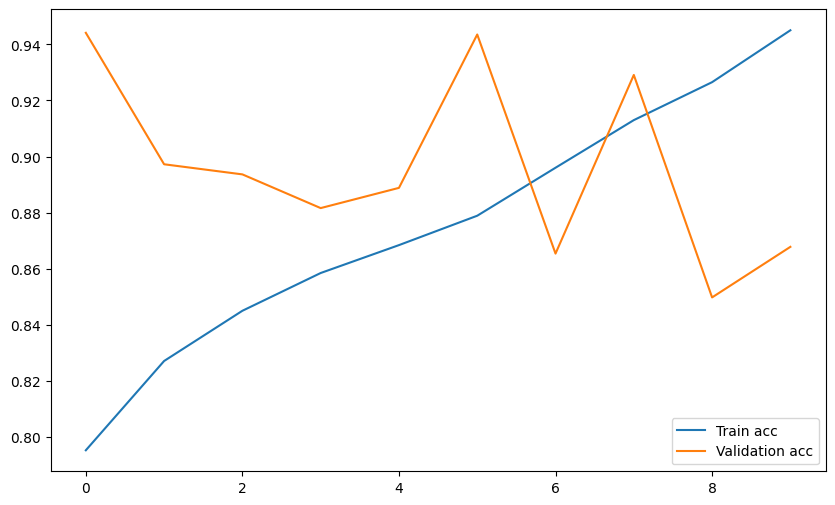

In [21]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

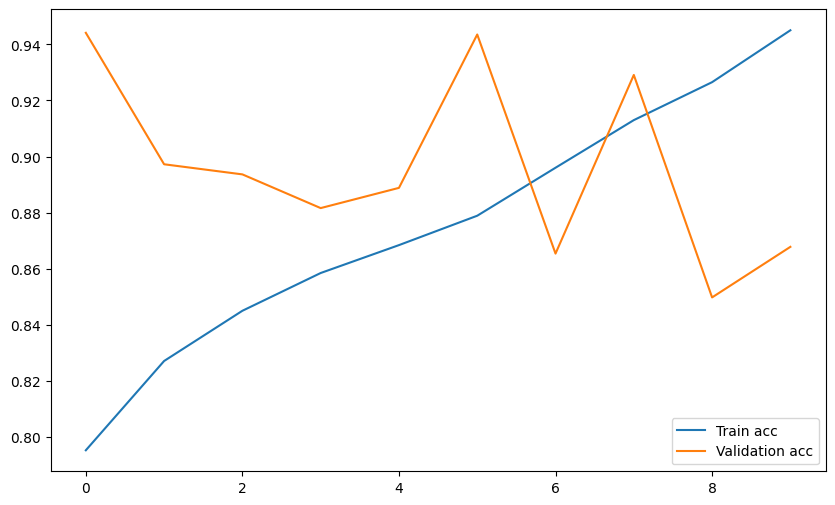

In [64]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

In [2]:
def predict_func(img):
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img = cv2.resize(img, (224, 224))
    img = np.reshape(img, [-1, 224, 224,3])
    result = np.argmax(model.predict(img))
    if result == 0: print("This image shows recyclable waste")
    elif result ==1: print("This image shows organic waste")

In [ ]:
test_img = cv2.imread("\waste classification\DATASET\DATASET\TEST\O\O_13039.jpg")
predict_func(test_img)

In [ ]:
test_img = cv2.imread("\waste classification\DATASET\DATASET\TEST\R\R_10050.jpg")
predict_func(test_img)